# **ENOE $^N$: Un Análisis Geoespacial de la Informalidad en México 2022 Trimestre 1**

---

## **Metodología para la medición de Informalidad**

Con base en *Conociendo la base de datos de la ENOE. Datos ajustados a proyecciones de población 2010. (2020)*, INEGI.


> **Resumen de la base de datos de la ENOE**: Por cada vivienda existe uno o más registros de hogares, para cada hogar con entrevista completa (más
adelante se defi ne entrevista completa) se cuenta con el registro de las características sociodemográfi cas
de cada residente, es decir, cada hogar tiene a sus residentes en la tabla de sociodemográfico (SDEM)
y para cada residente con edad de 12 años cumplidos ó más se cuenta con un registro del Cuestionario
de Ocupación y Empleo, el cual se almacena en las tablas COE1 (de batería 1 a 5) y COE2 (de batería
6 a la última).

Basándose en lo anterior, se concluye que es posible identificar a los **residentes de un hogar** en la tabla de **caracteristicas sociodemográficas** (`SDEM`) dentro de la base de datos de la **ENOE**. Es importante señalar que cada **fila/registro** dentro de esta última, corresponde a las cáracteristicas de una única persona. Sin embargo, se puede conocer la **Frecuencia absoluta expandida** i.e. el número de personas que cuentan con las mismas mediante el **factor de expansión** en el **campo/columna** `FAC`.

> “El factor de expansión es el coeficiente que le otorga determinado peso en la muestra en función de su representatividad de otros tantos casos 
similares a él tomando en cuenta su estrato socioeconómico y lugar de residencia”.

$$ registro_i \times FAC = \text{Frecuencia absoluta expandida} \tag{1}$$

> **Nota**: En la nueva base de datos **ENOE $^N$**, la variable `FAC` es reemplazada por `fac_tri` y `fac_mes`

En términos técnicos, es posible identificar a la población en el **sector informal** al filtrar por los registros que, en el campo de **Tipo de Unidad Económica 2** (`TUE2`) de la tabla `SDEM` cuenten con un valor de **5**.

```SQL

* Con esta sentencia se obtiene a la población económicamente activa.
SUM FAC FOR R_DEF=’00’ AND (C_RES=1 OR C_RES=3) AND (EDA>=’15’ AND EDA<=’98’) AND
CLASE1=1

* Para calcular los indicadores estratégicos e.g. Población en informalidad, se les aplica
* el pre-criterio siguiente:
R_DEF=’00’ AND (C_RES=’1’ OR C_RES=’3’) AND (EDA>=’15’ AND EDA<=’98’)

* Con esta se identificaría a la población en el sector informal
SELECT sum FAC FROM SDEM ... AND TUE2 = 5
```

Dando continuidad a la parte técnica, algo que se destaca es que, además del filtro de `TUE=5`, el cuál nos permite identificar personas dentro del **sector informal**, otras variables y criterios son empleados para encontrar a estos residentes: `R_DEF`, `C_RES` y `EDA`. El **INEGI** los describe como:

- > `R_DEF`: Existe un campo en la tabla HOGARES con el nombre “R_DEF” que almacena el resultado definitivo
de la entrevista del hogar, una ENTREVISTA COMPLETA se determina cuando en el campo “R_DEF”
almacena el valor ‘00’ (doble cero). Todo valor diferente a 00, es considerado como NO ENTREVISTA (ver documento de captación CARACTERISTICAS SOCIODEMOGRAFICAS en el apartado resultados de la entrevista).

- > `C_RES`:  En la tabla SOCIODEMOGRÁFICO existe el campo “C_RES”, que determina la condición de residencia
del ocupante del hogar. Si el valor que almacena este campo es 1, se trata de un residente habitual; si el
valor es 2, se trata de ausente definitivo; si el valor es 3, es un nuevo residente. Para mayor información
ver documento metodológico de la ENOE.

- > `EDA`:  En el campo “EDA”, se almacenan los años cumplidos. Si la edad del residente es de 12 años y más y
además tiene un 1 o un 3 en el campo “C_RES”, debe de existir un registro en la tabla CUESTIONARIO
DE OCUPACIÓN Y EMPLEO, si no cumple con estas características se termina su secuencia en la tabla
SOCIODEMOGRÁFICO.

Con base en lo anterior, se concluye que para que **un residente** sea considerado para calcular **indicadores estratégicos** es necesario que este: **1)** cuente con **entrevista completa** (`R_DEF = '00'`), **2)** sea **residente habitual** o **nuevo** (`C_RES` = '1' OR `C_RES` = '3'), y **3)** su edad se encuentre dentro de los **15** y **98** años (`EDA` >= '15' AND `EDA` <= '98').

Para calcular la **tasa de desocupación en el sector informal**, utilizado como un **acercamiento y comparativo** de la **informalidad** a nivel **entidad federativa** y **municipio**, se utiliza la formula definida por la **INEGI** dentro de su documento *Conociendo la base de datos de la ENOE (2020)*, (p.27):

**VIII.-Tasa de ocupación en el sector informal**

```SQL
Universo: R_DEF=00 y C_RES=1 ó 3 y edad=15-98
```

$$ TOSI = \frac{POSI}{PO} \times 100 \tag{2}$$

**Donde**:
- **POSI**: Población ocupada en el sector informal (`TUE2=5`)
- **PO**: Población ocupada (`Clase2 = 1`)

## **Fuentes**

- INEGI. (2020). *Cómo se hace la ENOE. Métodos y Procedimientos*. https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/nueva_estruc/702825190613.pdf
- INEGI. (2020). *Conociendo la base de datos de la ENOE. Datos ajustados a proyecciones de población 2010.*. https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/con_basedatos_proy2010.pdf
- INEGI. (2021). *Encuesta Nacional de Ocupación y Empleo Nueva Edición (ENOE $^N$) Estructura de la base de datos*. https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/enoe_n_321_fd_c_bas_amp.pdf 
- INEGI. (2022). *Indicadores Laborales para los Municipios de México ILMM*. https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/nueva_estruc/889463908128.pdf
- INEGI. (2023). *INDICADORES LABORALES PARA LOS MUNICIPIOS DE MEXICO (ILMM) 2022. Presentación de resultados*. https://www.inegi.org.mx/contenidos/programas/ilmm/doc/ilmm_2022_presentacion_resultados.pdf

### **Bases de datos**
- Conjunto de datos + metadatos: https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/datosabiertos/2022/conjunto_de_datos_enoen_2022_1t_csv.zip
- Conjunto de datos simplificado (solo tablas en excel): https://www.inegi.org.mx/programas/enoe/15ymas/#Microdatos

### **Benchmark del 1er trimestre**
- Encuesta Nacional de Ocupación y Empleo (Nueva Edición) ENOE N. Resultados del primer trimestre de 2022. https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/enoe_n_presentacion_ejecutiva_trim1_2022.pdf
- Comunicado de Prensa. Encuesta Nacional de Ocupación y Empleo, Nueva Edición. Primer Trimestre de 2022. https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/doc/enoe_n_nota_tecnica_trim1_2022.pdf

# **TO DO**:

- Elaborar mapas para ubicar la informalidad en México
- Ubicar las localidades/municipios con mayor porcentaje de población en el sector informal
- Identificar las zonas rurales y urbanas con mayor porcentaje de población en el sector informal
- Analizar características socioeconómicas relevantes por región y presentarlas en los mapas
    - `SEX` Proporción hombre - mujer (poblacion total en localidad) **CHECK**
    - **calcular** Tasa de participacion **CHECK**
    - **calcular** Tasa de ocupación informal **CHECK**
    - `EDA` **Edad** ¿cuál es la mediana y promedio de edad? la desviación estandar de la edad pude decirnos algo? **CHECK**
        - 00: Menores de 1 años
        - 01-96: Número de años cumplidos del integrante del hogar
        - 97: 97 años y más
        - 98: Edad no especificada para mayores (12 años y más)
        - 99: Edad no especificada para menores de (00 a 11 años)
    - `N_HIJ` **Número de hijos nacidos**
        - 00: Ninguno
        - 01-25: Número de hijos
        - 99: No especificado
    - `E_CON` **Estado Conyugal**: el estar casado tiene relacion con la informalidad?
        - 1: Vive con su pareja en unión libre
        - 2: Está separado(a)
        - 3: Está divorciado(a)
        - 4: Está viudo(a)
        - 5: Esta casado(a)
        - 6: Está soltero(a)
        - 9: No sabe
    - `RAMA_EST1` **Clasificación de la población ocupada según sector de actividad-Totales**sector total (primario, secundario, ...)
        - 1: Primario
        - 2: Secundario
        - 3: Terciario
        - 4: No especificado
    - `ANIOS_ESC:num` **años de escolaridad**
        - 1 - 24: De uno hasta 24 años de escolaridad
        - 99: No especificado
    - `HRSOCUP:num` **horas trabajadas en la semana**
        - 1 - 168
    - `INGOCUP:num` Ingreso mensual
        - 1-999998
    - `ING_X_HRS`: Promedio de ingreso por hora trabajada
        - 11 enteros y punto y 5 decimales
    - **NICE2HAVE** POBREZA ENT-MUN


Automatizacion
1. Calcular los subdataframes de variables socioeconomicas para un trimestre
2. Calcular los subdataframes de variabls socioeconomicas para todos los trimestres
3. Juntar subdataframes trimestrales y obtener el promedio por variable socioeconomica
4. Juntar los promedios de variables socioeconomicas en un mismo dataframe

**NUEVO**
- Incluir **TODOS** los agregados de los trimestres, con una columna de `trimestre`
- Haz un groupby ('mun', 'ent') y calcula el promedio de los trimsestres
- Obten el dataframe final

- Hacer un mapa de sectores economicos, siendo el color el sector predominante y el alpha la % de la poblacion en ese sector

In [165]:
import pandas as pd # Manipulación de datos
import geopandas as gpd # Manipulación geospacial de datos
import numpy as np # Python numerico
import matplotlib.pyplot as plt # Visualizacion de datos
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import requests # Peticiones web
import os # Manipulacion del Sistema Operativo
import re # Regular expressions

from zipfile import ZipFile # Zipfile manipulacion

import warnings
warnings.filterwarnings('ignore')

In [184]:
# Lista para identificar un municipio junto con su entidad federativa
LOC_INDEX = ['ent', 'mun']
VAR_INT = LOC_INDEX + ['fac_tri', 'sex', 'eda', 'n_hij', 'e_con', 'rama_est1', 'anios_esc', 'hrsocup', 'ingocup', 'ing_x_hrs']
TOP = 10
# es_urbano_tri

In [181]:
def get_fac_value_aggfunc(df: pd.DataFrame, value: str, fac: str, aggfuncs: dict = {'mean': np.mean, 'median': np.median, 'std': np.std}):
    """Retorna los valores agregados de un valor con factor de expansión
    
    # Argumentos
    df: pd.DataFrame
        El dataframe donde se encuentra la data
    value: str
        El nombre de la columna/valor a multiplicar
    fac: str
        El nombre de la columna con el factor de expansion
    aggfuncs: dict (default = {'mean': np.mean, 'median': np.median, 'std': np.std})
    
    # Return
    aggfunc_values: dict
        Diccionario con el nombre del valor agregado como llave, y el valor agregado como valor
    """
    values = []
    aggfunc_values = {}

    # Itera sobre cada una de las filas
    for ix, row in df[[value, fac]].iterrows():
        values += [row[value]] * int(row[fac])

    # Regresa un numpy array con los valores
    values =  np.array(values)

    # Itera sobre cada una de las funciones de agregacion y 
    # retorna los resultados
    for aggfunc_name, aggfunc in aggfuncs.items():
        aggfunc_values[aggfunc_name] = aggfunc(values)

    return aggfunc_values


def get_fac_value_aggfunc_groupby(df: pd.DataFrame, groupby: str | list | tuple, value: str, fac: str,
                                  aggfuncs: dict = {'mean': np.mean, 'median': np.median, 'std': np.std},
                                  suffix: str | bool = True):
    """Agrupa un dataframe mediante una llave y obten valores agregados por factor
    
    # Argumentos
    df: pd.DataFrame
        El dataframe por ser agrupado y agregado
    groupby: str | list | tuple
        La llave para agrupar un dataframe en subdataframes
    value: str
        El nombre de la columna/valor a multiplicar
    fac: str
        El nombre de la columna con el factor de expansion
    aggfuncs: dict (default = {'mean': np.mean, 'median': np.median, 'std': np.std})

    # Return
    grouped_by_df: pd.DataFrame
        Dataframe indexado con los valores agregados por factor
    """

    # Define una lista en blanco para agregar los valores
    # del agrupamiento
    grouped_by_values = []

    # Agrupa por el groupby
    grouped_by = df.groupby(groupby)

    # Itera sobre cada uno de los indices y sub dataframes agrupados
    for ix, grouped_df in list(grouped_by):

        # Obten los valores agregados multiplicados por su factor
        aggfunc_values = get_fac_value_aggfunc(grouped_df, value, fac, aggfuncs)

        # Genera un diccionario que combine los diccionarios del indice +
        # los resultados agregados
        grouped_df_values = dict(zip(groupby, ix)) | aggfunc_values

        # Agrega a la lista de grouped_by_values los resultados del
        # subdataframe
        grouped_by_values.append(grouped_df_values)

    # Genera un nuevo dataframe y determina como indice, el groupby
    # inicial
    grouped_by_df = pd.DataFrame(grouped_by_values).set_index(groupby)

    # Valida si suffix is None, entonces usa como sufijo del nombre
    # de las columnas agregadas, el string de value

    # Valida si se quiere agregar sufijo a las columnas
    if suffix:
        if type(suffix) is not bool:
            value = suffix

        # Renombra las columnas con el nuevo valor de sufijo
        grouped_by_df.rename(columns={col: f'{value}_{col}' for col in grouped_by_df.columns}, inplace = True)    

    # Regresa el dataframe
    return grouped_by_df


def get_trim_vars(trim_path: str, n_trim: int, fac: str = 'fac_tri', pivot_index: str | list = LOC_INDEX,
                  verbose = True):
    """
    Toma un conjunto de datos para un trimestre como input y regresa el agregado de variables
    socieconómicas.

    # Argumwents
    trim_path: str
        La dirección del file .csv
    n_trim: int
        El numero de trimestre
    fac_tri: str (default = 'fac_tri')
        El nombre de la columna que representa el factor de expansión
    pivot_index: str | list (default = LOC_INDEX)
        EL indice a utilizar para hacer una tabla pivote
    """

    # Genera una lista vacia para guardar el dataframe de las métricas
    # calculadas

    agg_vars_dfs = [
        # t_particip['tasa_participacion']: Tasa de participación
        # tosi['tasa_ocup_sector_informal']: Tasa de ocupación en el sector informal (TOSI)
        # poc_prop_sex['prop_pob_hombre']: Proporción hombre-mujer de la Poblacón Ocupada (POC)
        # poc_edad: Métricas sobre la edad de la POC
        # poc_n_hij: Métricas sobre el número de hijos de la POC
        # poc_e_con['tasa_casado']: Tasa de población casada de la POC
        # poc_sec_econ[['sec_econ_predominante', 'sec_econ_predominante_perc']]: Información sobre el sector económico predominante y su %
        # poc_anios_esc: Métricas sobre los años de escolaridad de la POC
        # poc_hrsocup: Métricas sobre las horas trabajadas en la semana de la POC
        # poc_ingocup: Métricas sobre el ingreso mensual de las personas ocupadas
        # poc_ing_x_hrs: Métricas sobre el ingreso promedio por hora de la POC
    ]

    def save_and_print_section(df, section_name: str, verbose: bool = verbose):
        """Imprime si ya se ejecutó la sección
        
        # Arguments
        section_name: str
            El nombre de la sección
        verbose: bool (default = verbose)
            Define si se quiere imprimir (True) o no (False) mensaje post proceso
        """
        # Guarda el dataframe de la seccion en la lista de dataframes
        agg_vars_dfs.append(df)

        if verbose:
            print(f'[+] LISTO: \'{section_name}\' para trimestre \'{n_trim}\', del file: \'{trim_path}\'')


    # Importa el dataframe
    trim_df = pd.read_csv(trim_path, encoding = 'latin_1')

    # Crea una columna que considere el tamaño de localidad para identificar si es rural o urbano
    # con informacion trimestral
    trim_df['es_urbano_tri'] = np.where(trim_df['t_loc_tri'] != 4, 1, 0)

    # Primero valida si las columnas tienen caracteres diferentes a alfanumerico y (-_), de ser asi
    # borra esos simbolos y manten lo demas
    trim_df.columns = [re.sub('[^a-zA-Z0-9\-\_]+', '', col) for col in trim_df.columns]

    # Cambia el tipo de data de las siguientes variables
    trim_df = trim_df.astype({'mun': 'str', 'ent': 'str', 'r_def': 'str', 'c_res': 'str', 'eda': 'str', 'sex': 'str'}) # Reemplaza el tipo de dato de variables que seran importantes para filtrar

    # Reemplaza valores nulos ' ' en la base de datos con np.NaN
    trim_df.replace({' ':np.nan}, inplace = True)

    # Para el uso de variables precodificadas, haz una query
    trim_df = trim_df.query("r_def == '0' and (c_res == '1' or c_res == '3') and (eda >= '15' and eda <= '98')")

    # ---
    # Tasa de participación
    # Crea una variable que indetifique Población Económicamente Activa (PEA)
    trim_df['es_pea'] = np.where((trim_df['clase1'] == 1), 1, 0)

    # Genera un pivote para calcular la tasa de participación
    t_particip = trim_df.query('clase1 == 1 or clase1 == 2').pivot_table(
        index = pivot_index,
        values = fac,
        columns = 'es_pea',
        aggfunc = 'sum'
    )

    # Define una nueva columna con la tasa de participacion
    t_particip['tasa_participacion'] = t_particip[1] / t_particip.sum(axis = 1)

    # Agregalo en la lista de dataframes
    save_and_print_section(t_particip['tasa_participacion'], 'Tasa de Participación')

    # ---
    # Genera un dataframe que solo contenga a la población ocupada
    # esta servira para la elaboración de las siguintes métricas
    poc = trim_df.query('clase2 == 1')

    # ---
    # Tasa de ocupación en el sector informal

    # Crea una columna que identifiqu si el registro pertenece al sector informal
    poc['es_sector_informal'] = np.where(poc['tue2'] == 5, 1, 0)

    # Calcula la TOSI
    tosi = poc.pivot_table(
        index = pivot_index,
        values = fac,
        columns = 'es_sector_informal',
        aggfunc = 'sum'
    )
    
    # Calcula la tasa de ocupacion en el sector informal
    tosi['tasa_ocup_sector_informal'] = tosi[1] / tosi.sum(axis = 1)
    
    # Hay algunos casos en los parece NO haber trabajadors en el sector informal
    # i.e. la tasa aparecerá como np.nan, dado que se divide tosi[1] (np.nan) entre la suma
    # Entonces se reemplazan nans con 0
    tosi['tasa_ocup_sector_informal'].fillna(0, inplace = True)

    # Agrega el dataframe a la lista de dataframes
    agg_vars_dfs.append(tosi['tasa_ocup_sector_informal'])

    # ---
    # Proporción Hombre-Mujer de la población ocupada
    poc_prop_sex = poc.pivot_table(
        index = pivot_index,
        values = fac,
        columns = 'sex',
        aggfunc = 'sum'
    )

    # Proporcion de poblacion hombre
    poc_prop_sex['prop_pob_hombre'] = poc_prop_sex['1'] / poc_prop_sex.sum(axis = 1)

    # Agrega el dataframe a la lista de dataframes
    save_and_print_section(poc_prop_sex['prop_pob_hombre'], 'Proporción Hombres % POC')

    # ---
    # Edad de la población Ocupada
    # Calcula metricas agregadas de la edad sobre la Población ocupada
    poc_edad = get_fac_value_aggfunc_groupby(poc.astype({'eda':'float64'}).query('eda < 98'),
                                             groupby = pivot_index, value = 'eda', fac = fac)
    
    # Agrega el dataframe a la list ade dataframes
    save_and_print_section(poc_edad, 'Métricas de Edad de la POC')

    # ---
    # Número de hios de la Población Ocupada

    # Primero haz un filtro sobre poblacion ocupada y numero de hijos nacidos < 99
    poc_n_hij = poc.query('n_hij < "99"').astype({'n_hij':'float64'})

    # Calcula las metricas por entidad y municipio
    poc_n_hij = get_fac_value_aggfunc_groupby(poc_n_hij, groupby = pivot_index,
                                          value = 'n_hij', fac = fac)

    # Agrega el dataframe a la lista de dataframes
    save_and_print_section(poc_n_hij, 'Métricas de Número de Hijos de la POC')

    # ---
    # Estado Conyugal de la Población Ocupada (tasa casado)
    poc['es_casado'] = np.where(poc['e_con'] == '5', 1, 0)

    # Obten el mumero de personas ocupadas y con estado conyugal = casado
    poc_e_con = poc.pivot_table(
        index = pivot_index,
        values = fac,
        columns = 'es_casado',
        aggfunc = 'sum'
    )

    # Obten la tasa de poblacion ocupada casada
    poc_e_con['tasa_casado'] = poc_e_con[1].divide(poc_e_con.sum(axis = 1))    
    
    # Reemplaza NaNs con 0, hay algunos registros en los que, segun los datos, no hay
    # poblacion casada
    poc_e_con['tasa_casado'].fillna(0, inplace = True)

    # Guarda el dataframe en la lista de dataframes
    save_and_print_section(poc_e_con['tasa_casado'], 'Tasa de Población Casada de la POC')

    # ---
    # Identifica el sector económico predominante

    # Identifica cada uno de los sectores económicos y el número de personas
    # que pertenecen a dicho sector
    poc_sec_econ = poc.pivot_table(
        index = pivot_index,
        values = fac,
        columns = 'rama_est1',
        aggfunc = 'sum'
    )
    
    # Primero identifica el sector predominante en función del número de personas ocupadas
    # que pertenecen a dicho sector. El que tenga más personas, de determinará como predominante.
    poc_sec_econ['sec_econ_predominante'] = poc_sec_econ.apply(lambda loc: poc_sec_econ.columns[loc.argmax()], axis = 1)

    # Una vez identificado el sector predominante, calcula el porcentaje de la población que se encuentra en el sector
    poc_sec_econ['sec_econ_predominante_perc'] = poc_sec_econ.apply(lambda loc: loc[loc['sec_econ_predominante']] / np.sum(loc[[1, 2, 3, 4]]), axis = 1)

    # Agrega el dataframe a la lista de dataframes
    save_and_print_section(poc_sec_econ[['sec_econ_predominante', 'sec_econ_predominante_perc']], 'Sector Ecónomico Predominante de la POC')


    # ---
    # Años de escolaridad
    
    # Crea el dataframe de anios de escolaridad de la poblacion ocupada
    poc_anios_esc = poc.astype({'anios_esc':'float64'}).query('anios_esc < 99')

    # Crea el dataframe con la mtrics de años de escolaridad de la poblacion ocupada
    poc_anios_esc = get_fac_value_aggfunc_groupby(poc_anios_esc,
                                          groupby = pivot_index, value = 'anios_esc',
                                          fac = fac)
    
    # Agrega el dataframe de anios de esc a la lista de dataframes
    save_and_print_section(poc_anios_esc, 'Métricas de los Años de Escolaridad de la POC')

    # ---
    # Horas trabajadas en la semana

    # Crea el dataframe con las metricas de las horas ocupadas en al semana
    poc_hrsocup = get_fac_value_aggfunc_groupby(poc,
                                                groupby = pivot_index, value = 'hrsocup',
                                                fac = fac)
    
    # Agrega el dataframe a la lista de dataframes
    save_and_print_section(poc_hrsocup, 'Métricas de las Horas Trabajadas en la Semana de la POC')

    # ---
    # Ingreso mensual

    # Crea un dataframe con las metricas del ingreso mensual de las personas ocupadas
    poc_ingocup = get_fac_value_aggfunc_groupby(poc, groupby = pivot_index,
                                                value = 'ingocup', fac = fac)
    
    # Agrega el dataframe a la lista de dataframes
    save_and_print_section(poc_ingocup, 'Métricas del Ingreso Mensual de la POC')

    # ---
    # Promedio de ingreso por hora trabajada
    poc_ing_x_hrs = get_fac_value_aggfunc_groupby(poc, groupby = pivot_index,
                                                  value = 'ing_x_hrs', fac = fac)
    
    # Agrega el dataframe a la lista de dataframes
    save_and_print_section(poc_ing_x_hrs, 'Métricas del Ingreso Promedio por Hora de la POC')

    #---
    # Concatena todos los dataframes en uno mismo

    # Inicializa la variable del dataframe trimestral de variables agregadas
    # con el primer dataframe de la lista
    trim_vars = agg_vars_dfs[0]

    # Itera sobre los dataframes restantes y haz un join con los index como keys
    for agg_vars_df in agg_vars_dfs[1:]:
        trim_vars = pd.merge(trim_vars, agg_vars_df,
                            left_index = True, right_index = True)

    # Agrega una columna que indique el trimestre del dataframe
    trim_vars['n_trim'] = f'{n_trim}'

    # Una vez termine, retorna el dataframe combinado
    return trim_vars


def map_quantile(series, q: int = 10):
    """Map the quantile of ALL values within a numerical column
    
    # Arguments
    series: pd.Series
        The series to be mapped
    q: int (default = 10)
        The number of quantiles i.e. number of categories to map the values with
    """
    quantiles = [series.quantile(q) for q in np.linspace(0, 1, q + 1)[1:]]

    def value_quantile(val: float):
        """
        Evaluate the current value and the given quantiles and found in which quantile the value corresponds to

        # Arguments
        val: float
            The value to be evaluated
        """
        for n_quantil, quantil in enumerate(quantiles, start = 1):
            if val <= quantil:
                return n_quantil
            
    return list(map(value_quantile, series))


Para facilitar el acceso a los archivos y el replicar este **jupyter notebook**, se descargan los datos de la ENOE $^N$ de forma automatizada.

In [4]:
# Define una lista con los links de los zipFiles que contienen las tablas de la base de datos
# de la enoen
enoen_links = [
    'https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_2022_trim1_csv.zip',
    'https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_2022_trim2_csv.zip',
    'https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_2022_trim3_csv.zip',
    'https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_2022_trim4_csv.zip'
]


# Itera sobre cada uno de lis links de los trimestres de la enoeN 2022 y descarga
# los archivos si aun no estan
enoe_n_path = 'data/enoe_n_2022/'
for trim, enoen_link in enumerate(enoen_links, start = 1):
    current_trim = f'enoe_n_2022_{trim}t'

    # Valida si no se encuentra la tabla de sociodemograficos del trimestre
    if not f'ENOEN_SDEMT{trim}22.csv' in os.listdir(enoe_n_path):
        print(f'[*] \'{current_trim}\' no fue encontrado. Descargando los archivos :)')

        # Haz un web request al INEGI para descargar la data
        enoen = requests.get(enoen_link)
        enoen_zip = f'{current_trim}.zip'

        # Abre un zipfile y escribe el contenido del web request
        open(enoen_zip, 'wb').write(enoen.content)

        # Extrae las tablas dentro del zipfile del trimstre
        with ZipFile(enoen_zip, 'r') as zObject:
            zObject.extractall(enoe_n_path)

        # Elimina el zip file, y solo quedate con las tablas
        os.remove(enoen_zip)

        print(f'[*] \'{enoen_zip}\' ha sido descargado y descomprimido en \'{enoe_n_path}\'\n')

    else:
        print(f'[*] {current_trim} ya fue descargado :)')

[*] enoe_n_2022_1t ya fue descargado :)
[*] enoe_n_2022_2t ya fue descargado :)
[*] enoe_n_2022_3t ya fue descargado :)
[*] enoe_n_2022_4t ya fue descargado :)


Extra los datos **geográficos** del **INEGI**

In [5]:
geo_data_path = 'data/mg_sep2019_integrado'

# Intenta listar el folder con la data geografica
try:
    os.listdir(geo_data_path)
    print('[*] La data geográfica ya esta descargada :)')
except:
    # Crea el folder
    os.mkdir(geo_data_path)
    print(f'[*] Creando el directorio \'{geo_data_path}\'')

    # Descarga los archivos
    print('[*] Descargando la data geográfica...')
    r = requests.get('http://internet.contenidos.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463776079/mg_sep2019_integrado.zip')
    open('mg_sep2019_integrado.zip', 'wb').write(r.content)
    
    # Extrae solo los datos del conjunto de datos para mun y ent
    with ZipFile('mg_sep2019_integrado.zip', 'r') as zipObject:
        filenames = [filename for filename in zipObject.namelist() if '00mun' in filename or '00ent' in filename]
        for filename in filenames:
            print(f'[*] Extrayendo \'{filename}\' en \'{geo_data_path}\'')
            zipObject.extract(filename, 'data/')
    
    # Una vez extraidos los archivos, elimina el zip file
    os.remove('mg_sep2019_integrado.zip')

[*] La data geográfica ya esta descargada :)


Extrae las estimaciones de los **Indicadores Laborales para los Municipios de México (ILMM)**

In [226]:
ilmm_2022_path = 'data/ilmm_2022_bd_xlsx'
ilmm_2022_filename = 'ilmm_2022_bd_xlsx.zip'

# Intenta listar el folder
try:
    os.listdir(ilmm_2022_path)
    print('[*] La data geográfica ya esta descargada :)')
except:
    # Crea el folder
    os.mkdir(ilmm_2022_path)
    print(f'[*] Creando el directorio \'{ilmm_2022_path}\'')

    # Descarga los archivos
    print('[*] Descargando la data de Indicadores Laborales para los Municipios de México (ILMM)...')
    r = requests.get('https://www.inegi.org.mx/contenidos/programas/ilmm/microdatos/ilmm_2022_bd_xlsx.zip')
    open(ilmm_2022_filename, 'wb').write(r.content)
    
    # Extrae solo los datos del conjunto de datos para mun y ent
    with ZipFile(ilmm_2022_filename, 'r') as zipObject:
        for filename in zipObject.namelist():
            zipObject.extract(filename, ilmm_2022_path)

    # Define el nombre del zipFile de la base de datos y el nuevo directorio
    # para guardar la base de datos
    base_datos_path = os.path.join(ilmm_2022_path, 'base_datos')
    base_datos_filename = os.path.join(ilmm_2022_path, 'base_datos.zip')

    # Abre el zipFile de base de datos
    with ZipFile(base_datos_filename, 'r') as zipObject:
        filenames = [file for file in zipObject.namelist() if '.xlsx' in file]
        for file in filenames:
            zipObject.extract(file, base_datos_path)

    # Una vez extraidos los archivos, elimina el zip file
    os.remove(ilmm_2022_filename)

[*] Creando el directorio 'data/ilmm_2022_bd_xlsx'
[*] Descargando la data de Indicadores Laborales para los Municipios de México (ILMM)...


## **Importa los datos**

Para este trabajo, en esencia, se utilizará la tabla de **demográficos** de la base de de datos de la ENOE $^N$.

In [6]:
# Importa el trimestre 1 para reconocimiento
df = pd.read_csv('data/enoe_n_2022/ENOEN_SDEMT122.csv', encoding = 'latin_1',
                 dtype = {'ent': 'str', 'mun': 'str', 'r_def': 'str', 'c_res': 'str', 'eda': 'str', 'sex': 'str'}) # Reemplaza el tipo de dato de variables que seran importantes para filtrar

# Reemplaza valores nulos ' ' en la base de datos con np.NaN
df.replace({' ':np.nan}, inplace = True)

# Muestra el head del dataframe
df.head()

,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,NaN,2,10,122,NaN,0,1,NaN,1,...,6,1,2,2,0,3,2,2,1,96
1,0,NaN,2,10,122,NaN,0,1,NaN,1,...,12,1,2,2,0,3,2,2,1,96
2,0,NaN,2,10,122,NaN,0,1,NaN,1,...,12,1,2,2,0,3,6,4,1,96
3,0,NaN,2,10,122,NaN,0,1,NaN,1,...,5,1,2,2,0,3,2,2,1,96
4,0,NaN,10,30,124,113,0,1,1,1,...,14,1,2,2,0,3,2,2,2,1


> Para el uso de las variables (precodificadas) se debe aplicar el siguiente criterio: `R_DEF = 0 AND C_RES 1 or 3 AND EDA >= 15 <= 98`

In [7]:
# Haz un query/busqueda con los siguientes filtros
df = df.query("r_def == '0' and (c_res == '1' or c_res == '3') and (eda >= '15' and eda <= '98') ")

# Muestra el head del dataframe
df.head()

,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,NaN,2,10,122,NaN,0,1,NaN,1,...,6,1,2,2,0,3,2,2,1,96
1,0,NaN,2,10,122,NaN,0,1,NaN,1,...,12,1,2,2,0,3,2,2,1,96
2,0,NaN,2,10,122,NaN,0,1,NaN,1,...,12,1,2,2,0,3,6,4,1,96
3,0,NaN,2,10,122,NaN,0,1,NaN,1,...,5,1,2,2,0,3,2,2,1,96
4,0,NaN,10,30,124,113,0,1,1,1,...,14,1,2,2,0,3,2,2,2,1


In [8]:
# Mustra la estadistica descriptiva del sobre variables de interes
df[VAR_INT].replace(' ', np.nan).astype('float64').describe()

,ent,mun,fac_tri,sex,eda,n_hij,e_con,rama_est1,anios_esc,hrsocup,ingocup,ing_x_hrs
count,353440.000000,350362.000000,353440.000000,353440.000000,353440.000000,161996.000000,306126.000000,353440.00000,353440.000000,353440.000000,353440.000000,353440.000000
mean,16.292120,39.940955,323.864557,1.524253,36.732724,2.156998,4.427102,1.29186,8.962412,20.512769,2842.435200,16.771815
std,9.276879,56.718940,397.731806,0.499412,20.826899,2.450145,1.796532,1.37238,6.434168,24.292902,5665.089082,41.346563
min,1.000000,1.000000,13.000000,1.000000,2.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,109.000000,1.000000,21.000000,0.000000,4.000000,0.00000,6.000000,0.000000,0.000000,0.000000
50%,16.000000,22.000000,179.000000,2.000000,35.000000,2.000000,5.000000,0.00000,9.000000,0.000000,0.000000,0.000000
75%,24.000000,49.000000,406.000000,2.000000,52.000000,3.000000,6.000000,3.00000,12.000000,45.000000,5000.000000,25.000000
max,32.000000,570.000000,20679.000000,2.000000,98.000000,99.000000,9.000000,4.00000,99.000000,168.000000,233067.000000,3255.813950


**Notas**:
- `eda`: Para la **edad** se cree necesario filtrar la variable, excluyendo `=98` edad no especificada para mayores (12 años y más) o reemplazando los valores con `np.nan`. Esto debido a que este último valor podría considerarse una **variable categórica**, misma que pude meter ruido a la **estadística**, con el riesgo de no considerar a esta población **no especificada**
- `n_hij`: Para la variable de **números de hijos nacidos**, será necesario remover `=99`: No especificado para evitar **ruido en la estadística**.
- `e_con`: Para el **estado conyugal** es posible hacer una **variable dummy** que indique que está casado `=5`, pero manteniendo los `np.nan`, pues estos pueden representar a personas **no necesariamente** capaces de tener un **estado conyugal** e.g. **menores de edad**.
- `rama_est1`: Para la **rama de sector total** aún se mantiene `4: No especificado`.
- `anios_esc`: Sera necesario que al considerar la variable **años de escolaridad** `anios_esc`, se filtre para **NO** contar con valores `=99`. Es decir, no especificado. O reemplazar con `np.nan`

## **Calcula variables necesarias para la Estimación de Población Ocupada**

Estas variables serán necesarias para poder estimar la **Población Ocupada Informal** en áreas pequeñas.

## **Calcula tasas y variables de interés**

### **Tasa de participación**

Calcula la **tasa de participación** de los municipios.

$$TP = \frac{PEA}{P15yMAS} \times 100$$

Donde:
- **PEA**: Población Económicamente Activa (`Clase1 = 1`)
- **P15yMAS**: Población de 15 años y más (`EDA = 15 a 98`)

In [9]:
# Es Población Ecónomicamente Activa
df['es_pea'] = np.where((df['clase1'] == 1), 1, 0)

# Identifica a la población de 15 y mas (menos igual 98)
df['es_p15_y_mas'] = np.where((df['eda'] >= '15') & (df['eda'] <= '98'), 1, 0)

# Debido a que existen registros con clase1 == 0, hay que filtrar
# solo por clase1 == 1 or clase1 == 2 para poder obtener los mismos
# calculos que en el reporte del INEGI (58.7% a nivel nacional)
t_particip = df.query("clase1 == 1 or clase1 == 2").pivot_table(
    index = LOC_INDEX,
    values = 'fac_tri',
    columns = 'es_pea',
    aggfunc = 'sum',
)

# Define una nueva columna con la tasa de participacion
t_particip['tasa_participacion'] = t_particip[1] / t_particip.sum(axis = 1)

# Muestra el dataframe
t_particip

es_pea        0       1  tasa_participacion
ent mun                                    
1   1    313820  457071            0.592913
    10     6460    7190            0.526740
    11    15449   18515            0.545136
    2     11628   14765            0.559429
    3     23677   26209            0.525378
...         ...     ...                 ...
9   5    399889  494013            0.552648
    6    122661  174037            0.586580
    7    587373  848899            0.591043
    8     73216  124020            0.628790
    9     46360   58201            0.556622

[941 rows x 3 columns]

In [10]:
# Mustra la estadistica descriptiva
t_particip['tasa_participacion'].describe()

count    941.000000
mean       0.575927
std        0.088646
min        0.194444
25%        0.526316
50%        0.584906
75%        0.629890
max        0.907407
Name: tasa_participacion, dtype: float64

### **Tasa de ocupación en el sector informal**

$$ TOSI = \frac{POSI}{PO} \times 100$$

**Donde**:
- **POSI**: Población ocupada en el sector informal (`TUE2=5`)
- **PO**: Población ocupada (`Clase2 = 1`)

In [11]:
# Crea una columna que identifique si es del sector informal
df['es_sector_informal'] = np.where(df['tue2'] == 5, 1, 0)

# Clasificación de la población ocupada y desocupada; disponible y no disponible]
# 2. Población desocupada
df['es_poblacion_ocupada'] = np.where(df['clase2'] == 1, 1, 0)

# Calcula la tasa TOSI, 28.3% a nivel nacional
tosi = df.query("clase2 == 1").pivot_table(
    index = LOC_INDEX,
    columns = 'es_sector_informal',
    values = 'fac_tri',
    aggfunc = 'sum'
)

# Calcula la tasa de ocupacion en el sector informal
tosi['tasa_ocup_sector_informal'] = tosi[1] / tosi.sum(axis = 1)

# Debido a que en algunos registros, parece que no hay trajadores en el sector
# informal, llena los Nans producto del calculo anterior con 0
tosi['tasa_ocup_sector_informal'].fillna(0, inplace = True)

tosi

es_sector_informal         0         1  tasa_ocup_sector_informal
ent mun                                                          
1   1               354416.0   86692.0                   0.196532
    10                4920.0    2043.0                   0.293408
    11               13852.0    3984.0                   0.223368
    2                 8468.0    5403.0                   0.389518
    3                18274.0    7598.0                   0.293677
...                      ...       ...                        ...
9   5               319278.0  146811.0                   0.314985
    6               119186.0   48272.0                   0.288263
    7               518185.0  275763.0                   0.347331
    8                68698.0   43646.0                   0.388503
    9                32956.0   25043.0                   0.431783

[941 rows x 3 columns]

In [12]:
# Muestra la estadistica descriptiva
tosi.describe()

es_sector_informal,0,1,tasa_ocup_sector_informal
count,941.000000,931.000000,941.000000
mean,42328.645058,16832.273899,0.310064
std,78105.408236,27803.409032,0.140038
min,190.000000,223.000000,0.000000
25%,8822.000000,3583.500000,0.214480
50%,17212.000000,8115.000000,0.299806
75%,38359.000000,16522.500000,0.393443
max,778124.000000,275763.000000,0.872340


### **Población Ocupada**

A partir de este punto, se hará un enfoque en conocer los atributos/caracteristicas de **solo la poblacíon ocupada**

In [13]:
# Define el dataframe de población ocupada
poc = df.query('clase2 == 1')[VAR_INT]

# Muestra el dataframe con el head
poc.head()

,ent,mun,fac_tri,sex,eda,n_hij,e_con,rama_est1,anios_esc,hrsocup,ingocup,ing_x_hrs
0,9,2,1977,1,42,NaN,6,3,16,32,16000,116.27907
1,9,2,1977,2,26,0,6,3,17,32,0,0.00000
2,9,2,1977,2,28,0,6,3,16,32,0,0.00000
3,9,2,1977,2,29,0,6,2,16,32,0,0.00000
4,9,10,2129,2,60,2,3,3,9,40,0,0.00000


### **Proporción Hombre-Mujer de la Población Ocupada**

In [14]:
# Calcular la proporcion de hombre-mujer
# 1 corresponde a hombre; 2 mujer
poc_prop_sex = poc.pivot_table(
    index = LOC_INDEX,
    columns = 'sex',
    values = 'fac_tri',
    aggfunc = 'sum'
)

# Proporcion de poblacion hombre
poc_prop_sex['prop_pob_hombre'] = poc_prop_sex['1'] / poc_prop_sex.sum(axis = 1)
poc_prop_sex

sex             1         2  prop_pob_hombre
ent mun                                     
1   1    261113.0  179995.0         0.591948
    10     4716.0    2247.0         0.677294
    11    12344.0    5492.0         0.692083
    2      9154.0    4717.0         0.659938
    3     16871.0    9001.0         0.652095
...           ...       ...              ...
9   5    267737.0  198352.0         0.574433
    6     85788.0   81670.0         0.512296
    7    448536.0  345412.0         0.564944
    8     64187.0   48157.0         0.571343
    9     33105.0   24894.0         0.570786

[941 rows x 3 columns]

### **Edad de la Población Ocupada**

Calcula la **media, mediana y desviación estándar** de la **edad de la Población Ocupada**.

- `eda`: Para la **edad** se cree necesario filtrar la variable, excluyendo `=98` edad no especificada para mayores (12 años y más) o reemplazando los valores con `np.nan`. Esto debido a que este último valor podría considerarse una **variable categórica**, misma que pude meter ruido a la **estadística**, con el riesgo de no considerar a esta población **no especificada**.

En este caso se filtra, el reemplazar con `np.nan`, al final serían excluidos, siguiendo una lógica similar al filtrado.

In [15]:
# Calcula metricas agregadas de la edad sobre la Población ocupada
edad_poc = get_fac_value_aggfunc_groupby(poc.astype({'eda':'float64'}).query('eda < 98'),
                                         LOC_INDEX, 'eda', 'fac_tri')

# Muestra el dataframe
edad_poc

eda_mean  eda_median    eda_std
ent mun                                  
1   1    39.179987        39.0  13.494853
    10   42.910814        44.0  15.511211
    11   35.428347        33.0  14.033207
    2    36.850407        35.0  13.721539
    3    39.930465        39.0  15.614102
...            ...         ...        ...
9   5    42.830608        44.0  13.940913
    6    41.373538        41.0  13.163080
    7    40.984742        40.0  13.956084
    8    41.834197        41.0  13.435170
    9    43.322092        45.0  14.738958

[941 rows x 3 columns]

In [16]:
# Imprime la estadistica descriptiva
edad_poc.describe()

,eda_mean,eda_median,eda_std
count,941.000000,941.000000,941.000000
mean,40.468956,39.500000,14.588148
std,3.242988,4.270321,1.978158
min,31.400000,25.000000,0.000000
25%,38.367347,37.000000,13.399254
50%,40.142857,39.000000,14.407670
75%,42.293449,42.000000,15.763863
max,57.066667,56.000000,22.296213


### **Número de hijos de la Población Ocupada**

Calcula la **media, mediana y desviación estándar** de la **edad de la Población Ocupada**.

- `n_hij`: Para la variable de **números de hijos nacidos**, será necesario remover `=99`: No especificado para evitar **ruido en la estadística**.

In [17]:
# Primero haz un filtro sobre poblacion ocupada y numero de hijos nacidos < 99
poc_n_hij = poc.query('n_hij < "99"').astype({'n_hij':'float64'})

# Muestra la estadisctica descriptiva inicial
poc_n_hij['n_hij'].describe()

count    71633.000000
mean         1.846607
std          1.706353
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: n_hij, dtype: float64

In [18]:
# Calcula las metricas por entidad y municipio
poc_n_hij = get_fac_value_aggfunc_groupby(poc_n_hij, groupby = LOC_INDEX,
                                          value = 'n_hij', fac = 'fac_tri')

# Muestra los resultados
poc_n_hij

n_hij_mean  n_hij_median  n_hij_std
ent mun                                     
1   1      1.777726           2.0   1.698284
    10     1.872274           1.0   1.764046
    11     1.616169           2.0   1.632745
    2      1.668857           2.0   1.332775
    3      2.317076           1.0   2.953987
...             ...           ...        ...
9   5      1.453431           1.0   1.412501
    6      1.315808           1.0   1.145809
    7      1.585162           2.0   1.435594
    8      2.021741           2.0   1.457700
    9      2.534064           2.0   1.845880

[937 rows x 3 columns]

In [19]:
# Muestra la estadistica descriptiva
poc_n_hij.describe()

,n_hij_mean,n_hij_median,n_hij_std
count,937.000000,937.000000,937.000000
mean,2.157651,1.970117,1.758084
std,0.765162,0.888353,0.683061
min,0.000000,0.000000,0.000000
25%,1.736624,2.000000,1.388599
50%,2.021741,2.000000,1.642648
75%,2.454099,2.000000,2.051756
max,9.000000,9.000000,6.220129


### **Estado Conyugal de la Población Ocupada**


In [20]:
# Define una nueva variable sobre el dataframe de poc
poc['es_casado'] = np.where(poc['e_con'] == '5', 1, 0)

# Obten el numero de personas ocupadas y con estado conyugal = casado
poc_e_con = poc.pivot_table(
    index = LOC_INDEX,
    values = 'fac_tri',
    columns = 'es_casado',
    aggfunc = 'sum'
)

# Obten la tasa de poblacion ocupada casada
poc_e_con['tasa_casado'] = poc_e_con[1].divide(poc_e_con.sum(axis = 1))

# Debido a que en algunos registros parece que no habia ploblacion definida
# como casada, llena con Nans con 0
poc_e_con['tasa_casado'].fillna(0, inplace = True)

poc_e_con

es_casado         0         1  tasa_casado
ent mun                                   
1   1      234221.0  206887.0     0.469017
    10       3539.0    3424.0     0.491742
    11       8781.0    9055.0     0.507681
    2        7166.0    6705.0     0.483383
    3       12383.0   13489.0     0.521374
...             ...       ...          ...
9   5      318191.0  147898.0     0.317317
    6      118294.0   49164.0     0.293590
    7      549879.0  244069.0     0.307412
    8       73540.0   38804.0     0.345403
    9       39151.0   18848.0     0.324971

[941 rows x 3 columns]

In [21]:
# Obten la estadistica descriptiva
poc_e_con.describe()

es_casado,0,1,tasa_casado
count,940.000000,938.000000,941.000000
mean,36045.778723,23048.049041,0.408199
std,65495.125343,38842.244302,0.122492
min,326.000000,311.000000,0.000000
25%,7542.750000,5011.500000,0.333333
50%,14602.500000,10291.500000,0.400909
75%,31941.250000,22939.500000,0.484091
max,622552.000000,368806.000000,1.000000


### **Identifica el sector económico total con mayor proporción de ocupación**

In [22]:
# Indentifica cada uno de los sectores economicos y el numero de personas
# que pertenecen a dicho sector
poc_sec_econ = poc.pivot_table(
    index = LOC_INDEX,
    values = 'fac_tri',
    columns = 'rama_est1',
    aggfunc = 'sum'
)


# Primero calcula el porcentaje del total de poblacion
# de cada uno de los sectores economicos
poc_sec_econ['sec_econ_predominante'] = poc_sec_econ.apply(lambda loc: poc_sec_econ.columns[loc.argmax()], axis = 1)
poc_sec_econ['sec_econ_predominante_perc'] = poc_sec_econ.apply(lambda loc: loc[loc['sec_econ_predominante']] / np.sum(loc[[1, 2, 3, 4]]), axis = 1)

poc_sec_econ

rama_est1       1         2         3       4  sec_econ_predominante  \
ent mun                                                                
1   1      6251.0  135266.0  298623.0   968.0                      3   
    10     1186.0    2312.0    3465.0     NaN                      3   
    11     1823.0    8371.0    7642.0     NaN                      2   
    2      1785.0    5642.0    6444.0     NaN                      3   
    3      6022.0    7376.0   12474.0     NaN                      3   
...           ...       ...       ...     ...                    ...   
9   5         NaN   71551.0  392444.0  2094.0                      3   
    6         NaN   22287.0  144346.0   825.0                      3   
    7         NaN  135414.0  653713.0  4821.0                      3   
    8         NaN   11896.0  100448.0     NaN                      3   
    9      6354.0    3612.0   48033.0     NaN                      3   

rama_est1  sec_econ_predominante_perc  
ent mun                                
1   1                        0.676984  
    10                       0.497630  
    11                       0.469332  
    2                        0.464566  
    3                        0.482143  
...                               ...  
9   5                        0.841994  
    6                        0.861983  
    7                        0.823370  
    8                        0.894111  
    9                        0.828169  

[941 rows x 6 columns]

### **Años de escolaridad**

Calcula la **media, mediana y desviación estándar** de **años de escolaridad de la Población Ocupada**.

- `anios_esc`: Sera necesario que al considerar la variable **años de escolaridad** `anios_esc`, se filtre para **NO** contar con valores `=99`. Es decir, no especificado. O reemplazar con `np.nan`

In [23]:
# Crea el dataframe de anios de escolaridad de la poblacion ocupada
poc_anios_esc = poc.astype({'anios_esc':'float64'}).query('anios_esc < 99')

# Muestra la estadistica descriptiva
poc_anios_esc['anios_esc'].describe()

count    175867.000000
mean         10.882070
std           4.277329
min           0.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          23.000000
Name: anios_esc, dtype: float64

In [24]:
# Crea el dataframe de anios de escolaridad de la poblacion ocupada
poc_anios_esc = get_fac_value_aggfunc_groupby(poc_anios_esc,
                                              groupby = LOC_INDEX, value = 'anios_esc',
                                              fac = 'fac_tri')

# Muestra el dataframe de años de escolaridad
poc_anios_esc

anios_esc_mean  anios_esc_median  anios_esc_std
ent mun                                                 
1   1         11.587171              12.0       3.984535
    10         9.246589               9.0       3.660040
    11         9.232227               9.0       3.616638
    2          9.259292               9.0       3.728946
    3          8.471668               9.0       3.984234
...                 ...               ...            ...
9   5         11.958691              12.0       3.508352
    6         12.756524              12.0       3.322447
    7         11.284010              12.0       3.678974
    8         11.704844              12.0       3.560576
    9          9.531423               9.0       3.371365

[941 rows x 3 columns]

### **Horas trabajadas en la semana**

In [25]:
# Muestra la estadistica descriptiva de las horas trabajdas en
# la semana de la poblacion ocupada
poc['hrsocup'].describe()

count    176192.000000
mean         41.148480
std          18.294742
min           0.000000
25%          32.000000
50%          45.000000
75%          50.000000
max         168.000000
Name: hrsocup, dtype: float64

¿Cómo alguien puede tener 0 horas trabajadas a la semana, estando ocupado?

In [26]:
# Crea el datarame con las metricas de las horas ocupadas en la semana
poc_hrsocup = get_fac_value_aggfunc_groupby(poc, groupby = LOC_INDEX, value = 'hrsocup',
                                            fac = 'fac_tri')

# Muestra los resultados
poc_hrsocup

hrsocup_mean  hrsocup_median  hrsocup_std
ent mun                                           
1   1       43.811613            48.0    16.411092
    10      45.227201            48.0    18.271307
    11      43.781229            48.0    14.216028
    2       46.284118            48.0    13.263568
    3       43.027172            46.0    19.451891
...               ...             ...          ...
9   5       42.426481            40.0    18.933291
    6       43.848392            45.0    16.689258
    7       40.724066            40.0    18.416283
    8       40.307039            40.0    21.401615
    9       41.212521            42.0    19.470694

[941 rows x 3 columns]

### **Ingreso mensual**

In [27]:
# Muestra la estadistica descriptiva del ingreso mensual
poc['ingocup'].describe()

count    176192.000000
mean       5701.906426
std        6933.575666
min           0.000000
25%           0.000000
50%        5000.000000
75%        8170.000000
max      233067.000000
Name: ingocup, dtype: float64

In [28]:
# Obten el dataframe con las metricas del ingreso mensual de las personas ocupadas
poc_ingocup = get_fac_value_aggfunc_groupby(poc, groupby = LOC_INDEX, value = 'ingocup',
                                            fac = 'fac_tri')

# Muestra el dataframe con los resultados
poc_ingocup

ingocup_mean  ingocup_median  ingocup_std
ent mun                                           
1   1     4969.300403          3870.0  6984.169837
    10    3460.026713          2580.0  3889.328688
    11    4948.854283          5160.0  5000.323233
    2     4557.204023          5160.0  4174.095492
    3     3529.614641          3000.0  4994.567412
...               ...             ...          ...
9   5     3252.646265             0.0  7224.539340
    6     5046.872947             0.0  9576.689057
    7     3501.072020             0.0  5280.823744
    8     4306.133590             0.0  7506.116449
    9     2721.158227             0.0  4135.683473

[941 rows x 3 columns]

### **Promedio de ingreso por hora trabajada**

In [29]:
# Muestra la estadistica descriptiva del ingreso por hora trabajada de
# la poblacion ocupada
poc['ing_x_hrs'].describe()

count    176192.000000
mean         33.644150
std          53.494614
min           0.000000
25%           0.000000
50%          25.000000
75%          43.750000
max        3255.813950
Name: ing_x_hrs, dtype: float64

In [30]:
# Muestra el dataframe con los resultados del ingreso por hora trabajada de
# la poblacion ocupada por entidad y municipio
poc_ing_x_hrs = get_fac_value_aggfunc_groupby(poc, groupby = LOC_INDEX, value = 'ing_x_hrs', 
                                              fac = 'fac_tri')

# Muestra los rsultados
poc_ing_x_hrs

ing_x_hrs_mean  ing_x_hrs_median  ing_x_hrs_std
ent mun                                                 
1   1         25.745874          19.37984      38.098790
    10        18.484260           5.53710      25.142899
    11        26.040633          25.00000      28.993272
    2         24.529021          26.66667      26.372029
    3         20.968306          20.83333      29.332332
...                 ...               ...            ...
9   5         20.101344           0.00000      44.240265
    6         25.125732           0.00000      41.816959
    7         21.963570           0.00000      43.830012
    8         25.933356           0.00000      42.011599
    9         33.656471           0.00000      95.679875

[941 rows x 3 columns]

### **Concatena todos los dataframes en uno mismo**

In [31]:
# Crea una lista con todos los dataframes de metricas agregadas
# de las caracteristicas sociodemograficas/economicas de la poblacion
# por municipio y entidad

inform_dfs = [
    # Tasa de participacion
    t_particip['tasa_participacion'],

    # Tasa de ocupación en el sector informal
    tosi['tasa_ocup_sector_informal'],

    # Proporción Hombre-Mujer de la población ocupada
    poc_prop_sex['prop_pob_hombre'],

    # Edad de la población ocupada
    edad_poc[['eda_mean', 'eda_median', 'eda_std']],

    # Número de hijos de la poblacion ocupada
    poc_n_hij[['n_hij_mean', 'n_hij_median', 'n_hij_std']],

    # Estado conyugal de la poblacion ocupada (es casado)
    poc_e_con['tasa_casado'],

    # Sector economico predominante de la poblacion ocupada
    poc_sec_econ[['sec_econ_predominante', 'sec_econ_predominante_perc']],

    # Años de escolaridad de la población ocupada
    poc_anios_esc[['anios_esc_mean', 'anios_esc_median', 'anios_esc_std']],

    # Horas ocupadas a la semana de la poblacion ocupada
    poc_hrsocup[['hrsocup_mean', 'hrsocup_median', 'hrsocup_std']],

    # Ingreso mensual de la poblacion ocupada
    poc_ingocup[['ingocup_mean', 'ingocup_median', 'ingocup_std']],

    # Promedio de ingreso por hora trabajada de la poblacion ocupada
    poc_ing_x_hrs[['ing_x_hrs_mean', 'ing_x_hrs_median', 'ing_x_hrs_std']],
    
]

In [32]:
# Combina los resultados basados en el índice
inform_all = inform_dfs[0]

# Itera sobre cada uno de los dataframes, empezando desde la
# segunda posicion y concatena los dataframes
for inform_df in inform_dfs[1:]:
    inform_all = pd.merge(inform_all, inform_df, left_index = True, right_index = True)

# Muestra el dataframe
inform_all

tasa_participacion  tasa_ocup_sector_informal  prop_pob_hombre  \
ent mun                                                                   
1   1              0.592913                   0.196532         0.591948   
    10             0.526740                   0.293408         0.677294   
    11             0.545136                   0.223368         0.692083   
    2              0.559429                   0.389518         0.659938   
    3              0.525378                   0.293677         0.652095   
...                     ...                        ...              ...   
9   5              0.552648                   0.314985         0.574433   
    6              0.586580                   0.288263         0.512296   
    7              0.591043                   0.347331         0.564944   
    8              0.628790                   0.388503         0.571343   
    9              0.556622                   0.431783         0.570786   

          eda_mean  eda_median    eda_std  n_hij_mean  n_hij_median  \
ent mun                                                               
1   1    39.179987        39.0  13.494853    1.777726           2.0   
    10   42.910814        44.0  15.511211    1.872274           1.0   
    11   35.428347        33.0  14.033207    1.616169           2.0   
    2    36.850407        35.0  13.721539    1.668857           2.0   
    3    39.930465        39.0  15.614102    2.317076           1.0   
...            ...         ...        ...         ...           ...   
9   5    42.830608        44.0  13.940913    1.453431           1.0   
    6    41.373538        41.0  13.163080    1.315808           1.0   
    7    40.984742        40.0  13.956084    1.585162           2.0   
    8    41.834197        41.0  13.435170    2.021741           2.0   
    9    43.322092        45.0  14.738958    2.534064           2.0   

         n_hij_std  tasa_casado  ...  anios_esc_std  hrsocup_mean  \
ent mun                          ...                                
1   1     1.698284     0.469017  ...       3.984535     43.811613   
    10    1.764046     0.491742  ...       3.660040     45.227201   
    11    1.632745     0.507681  ...       3.616638     43.781229   
    2     1.332775     0.483383  ...       3.728946     46.284118   
    3     2.953987     0.521374  ...       3.984234     43.027172   
...            ...          ...  ...            ...           ...   
9   5     1.412501     0.317317  ...       3.508352     42.426481   
    6     1.145809     0.293590  ...       3.322447     43.848392   
    7     1.435594     0.307412  ...       3.678974     40.724066   
    8     1.457700     0.345403  ...       3.560576     40.307039   
    9     1.845880     0.324971  ...       3.371365     41.212521   

         hrsocup_median  hrsocup_std  ingocup_mean  ingocup_median  \
ent mun                                                              
1   1              48.0    16.411092   4969.300403          3870.0   
    10             48.0    18.271307   3460.026713          2580.0   
    11             48.0    14.216028   4948.854283          5160.0   
    2              48.0    13.263568   4557.204023          5160.0   
    3              46.0    19.451891   3529.614641          3000.0   
...                 ...          ...           ...             ...   
9   5              40.0    18.933291   3252.646265             0.0   
    6              45.0    16.689258   5046.872947             0.0   
    7              40.0    18.416283   3501.072020             0.0   
    8              40.0    21.401615   4306.133590             0.0   
    9              42.0    19.470694   2721.158227             0.0   

         ingocup_std  ing_x_hrs_mean  ing_x_hrs_median  ing_x_hrs_std  
ent mun                                                                
1   1    6984.169837       25.745874          19.37984      38.098790  
    10   3889.328688       18.484260           5.53710      25.142899  
    11   500

Ahora tenemos los resultados agregados de variables socioeconómicas a nivel **entidad federativa y municipio**

In [33]:
# Prueba el calculo de las métricas del trimestre con la función
trim_vars = get_trim_vars('data/enoe_n_2022/ENOEN_SDEMT122.csv', 1)

[+] LISTO: 'Tasa de Participación' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Proporción Hombres % POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Métricas de Edad de la POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Métricas de Número de Hijos de la POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Tasa de Población Casada de la POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Sector Ecónomico Predominante de la POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Métricas de los Años de Escolaridad de la POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Métricas de las Horas Trabajadas en la Semana de la POC' para trimestre '1', del file: 'data/enoe_n_2022/ENOEN_SDEMT122.csv'
[+] LISTO: 'Métricas del Ingreso Mensual de la POC' para trimes

In [34]:
# Valida si la función arroja los mismos resultados para todas las columnas
# en comparación con el primer dataframe combinado
for col in inform_all.columns:
    igualdad = all(trim_vars[col] == inform_all[col]) == True
    print(f'{"`" + col:>{len(max(inform_all.columns, key = len))+1}}` son iguales: {igualdad}')

        `tasa_participacion` son iguales: True
 `tasa_ocup_sector_informal` son iguales: True
           `prop_pob_hombre` son iguales: True
                  `eda_mean` son iguales: True
                `eda_median` son iguales: True
                   `eda_std` son iguales: True
                `n_hij_mean` son iguales: True
              `n_hij_median` son iguales: True
                 `n_hij_std` son iguales: True
               `tasa_casado` son iguales: True
     `sec_econ_predominante` son iguales: True
`sec_econ_predominante_perc` son iguales: True
            `anios_esc_mean` son iguales: True
          `anios_esc_median` son iguales: True
             `anios_esc_std` son iguales: True
              `hrsocup_mean` son iguales: True
            `hrsocup_median` son iguales: True
               `hrsocup_std` son iguales: True
              `ingocup_mean` son iguales: True
            `ingocup_median` son iguales: True
               `ingocup_std` son iguales: True
            `

In [35]:
# Para evitar tener tantos dataframes abiertos elimina
# los dataframe actuales
del df

## **Visualizando el promedio de la tasa de ocupación en el sector informal a nivel municipio en México, 2022 T1**

Una vez tenemos la data a nivel agregado y promedio, es momento de visualizarlo en mapas.

Antes de visualizar los mapas, es necesario cargar la **data geoespacial**

In [190]:
# Importa las claves de las entidades
catalogo_ent = pd.read_csv('data/catalogos/ent.csv', dtype = {'CVE': 'int64'}, encoding = 'latin')

# Mustra el head
catalogo_ent.head()

,CVE,DESCRIP
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila


In [280]:
# Importa la data a nivel entidad federativa
ent = gpd.read_file('data/mg_sep2019_integrado/conjunto_de_datos/00ent.shp')\
    .set_geometry('geometry')

# Muestra el dataframe
ent.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."


In [193]:
# Importa los datos geospacilas y guardalos como mx
mx = gpd.read_file('data/mg_sep2019_integrado/conjunto_de_datos/00mun.shp')\
    .astype({'CVE_ENT':'int64', 'CVE_MUN':'int64'})

# Concatena la clave de las entidades para obtener el nombre
mx = pd.merge(mx, catalogo_ent, left_on = 'CVE_ENT', right_on = 'CVE')

# Haz un resumen ep nombre de la entidad y municipio
mx['NOM_RESUM'] = mx.apply(lambda loc: f'{loc["DESCRIP"]}, {loc["NOMGEO"]}', axis = 1)

# Muestra el dataframe
mx

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,CVE,DESCRIP,NOM_RESUM
0,01001,1,1,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,"Aguascalientes, Aguascalientes"
1,01002,1,2,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948...",1,Aguascalientes,"Aguascalientes, Asientos"
2,01003,1,3,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,"Aguascalientes, Calvillo"
3,01004,1,4,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",1,Aguascalientes,"Aguascalientes, Cosío"
4,01005,1,5,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,"Aguascalientes, Jesús María"
...,...,...,...,...,...,...,...,...
2460,32054,32,54,Villa Hidalgo,"POLYGON ((2531223.368 1166188.348, 2531242.386...",32,Zacatecas,"Zacatecas, Villa Hidalgo"
2461,32055,32,55,Villanueva,"POLYGON ((2420011.778 1183552.394, 2420043.461...",32,Zacatecas,"Zacatecas, Villanueva"
2462,32056,32,56,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086...",32,Zacatecas,"Zacatecas, Zacatecas"
2463,32057,32,57,Trancoso,"POLYGON ((2476976.320 1198274.003, 2476566.139...",32,Zacatecas,"Zacatecas, Trancoso"


In [234]:
# Importa la data con las estimaciones del ILMM
ilmm = pd.read_excel('data/ilmm_2022_bd_xlsx/base_datos/EAP_ESTIMACIONES_PEA_OCU_INF_2022_T1.xlsx',
                     dtype = {'LLAVE':'str'})

# Calcula la proporción de informalidad
ilmm['tasa_ocup_sector_informal'] = ilmm['INFORMALES'] / ilmm['OCUPADOS']

# Muestra el head
ilmm.head()

,LLAVE,MUNICIPIO,T15ymas,EstisiPEA,RECMPEA,EstisiOCU,RECMOCU,EstisiINF,RECMINF,PEA,NO_PEA,OCUPADOS,DESOCUPADOS,FORMALES,INFORMALES,tasa_ocup_sector_informal
0,01001,Aguascalientes,754385.041437,0.592767,0.007720,0.572267,0.007986,0.210405,0.007101,447174.926380,307210.115057,431709.916861,15465.009520,272983.586158,158726.330703,0.367669
1,01002,Asientos,37587.402927,0.569720,0.018706,0.538130,0.016453,0.348144,0.038943,21414.279426,16173.123500,20226.907372,1187.372054,7141.089605,13085.817767,0.646951
2,01003,Calvillo,44246.504523,0.545312,0.018562,0.533965,0.018301,0.360662,0.023694,24128.159908,20118.344615,23626.103465,502.056443,7668.077486,15958.025979,0.675440
3,01004,Cosío,12600.577032,0.565166,0.027786,0.551600,0.028744,0.299613,0.039183,7121.418374,5479.158658,6950.472771,170.945603,3175.173740,3775.299031,0.543172
4,01005,Jesús María,97553.439193,0.607374,0.019216,0.589336,0.020273,0.273467,0.022734,59251.414529,38302.024664,57491.776054,1759.638474,30814.162926,26677.613128,0.464025


In [237]:
# Combina la data geoespacial con ILMM
ilmm_geo = pd.merge(mx, ilmm, left_on = 'CVEGEO', right_on = 'LLAVE')

# Define la geomtria del dataframe geoespacial
ilmm_geo.set_geometry('geometry', inplace = True)

# Muestra el head
ilmm_geo.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,CVE,DESCRIP,NOM_RESUM,LLAVE,MUNICIPIO,...,RECMOCU,EstisiINF,RECMINF,PEA,NO_PEA,OCUPADOS,DESOCUPADOS,FORMALES,INFORMALES,tasa_ocup_sector_informal
0,01001,1,1,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1,Aguascalientes,"Aguascalientes, Aguascalientes",01001,Aguascalientes,...,0.007986,0.210405,0.007101,447174.926380,307210.115057,431709.916861,15465.009520,272983.586158,158726.330703,0.367669
1,01002,1,2,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948...",1,Aguascalientes,"Aguascalientes, Asientos",01002,Asientos,...,0.016453,0.348144,0.038943,21414.279426,16173.123500,20226.907372,1187.372054,7141.089605,13085.817767,0.646951
2,01003,1,3,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",1,Aguascalientes,"Aguascalientes, Calvillo",01003,Calvillo,...,0.018301,0.360662,0.023694,24128.159908,20118.344615,23626.103465,502.056443,7668.077486,15958.025979,0.675440
3,01004,1,4,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",1,Aguascalientes,"Aguascalientes, Cosío",01004,Cosío,...,0.028744,0.299613,0.039183,7121.418374,5479.158658,6950.472771,170.945603,3175.173740,3775.299031,0.543172
4,01005,1,5,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",1,Aguascalientes,"Aguascalientes, Jesús María",01005,Jesús María,...,0.020273,0.273467,0.022734,59251.414529,38302.024664,57491.776054,1759.638474,30814.162926,26677.613128,0.464025


### **Visualiza**

In [238]:
# Crea una columna con los quantiles de la tasa de ocupación en el sector informal
ilmm_geo['tasa_ocup_sector_informal_quantile'] = map_quantile(ilmm_geo['tasa_ocup_sector_informal'], 4)

# Determina un diccionario con los colores de quantiles
quantile_colors = {1.0:'green', 2.0:'yellow', 3.0:'orange', 4.0:'red', np.nan: 'lightgrey'}

# Crea una columna con los colors de los quantiles
ilmm_geo['tasa_ocup_sector_informal_quantile_c'] = ilmm_geo['tasa_ocup_sector_informal_quantile'].map(quantile_colors)

In [264]:
# Identifica el TOP 10 con menos tasa de ocupacion en el sector informal
top_men_inform = ilmm_geo.sort_values('tasa_ocup_sector_informal', ascending = True).iloc[:TOP][['NOM_RESUM', 'tasa_ocup_sector_informal', 'tasa_ocup_sector_informal_quantile_c']]
top_men_inform

,NOM_RESUM,tasa_ocup_sector_informal,tasa_ocup_sector_informal_quantile_c
58,"Coahuila, Ramos Arizpe",0.238254,green
61,"Coahuila, Saltillo",0.249308,green
282,"Ciudad de México, Benito Juárez",0.259762,green
221,"Chihuahua, Chihuahua",0.260582,green
239,"Chihuahua, Juárez",0.269482,green
959,"Nuevo León, Apodaca",0.277992,green
999,"Nuevo León, San Nicolás de los Garza",0.285723,green
33,"Coahuila, Acuña",0.289521,green
77,"Colima, Minatitlán",0.298258,green
63,"Coahuila, San Juan de Sabinas",0.298636,green


Para identificar los municipios con **mayor tasa de ocupación en el sector informal** se tomará en cuenta tanto la **tasa**, como el tamaño de población.

In [284]:
# Identifica el TOP 10 con mayor tasa de ocupacion en el sector informal
top_mas_inform = ilmm_geo.sort_values(['tasa_ocup_sector_informal', 'T15ymas'], ascending = False).iloc[:TOP][['NOM_RESUM', 'tasa_ocup_sector_informal', 'tasa_ocup_sector_informal_quantile_c']]
top_mas_inform

,NOM_RESUM,tasa_ocup_sector_informal,tasa_ocup_sector_informal_quantile_c
102,"Chiapas, Chamula",1.0,red
160,"Chiapas, Simojovel",1.0,red
421,"Guerrero, Quechultenango",1.0,red
446,"Guerrero, Acatepec",1.0,red
85,"Chiapas, Amatenango de la Frontera",1.0,red
190,"Chiapas, San Juan Cancuc",1.0,red
151,"Chiapas, Pueblo Nuevo Solistahuacán",1.0,red
2113,"Veracruz, Ayahualulco",1.0,red
380,"Guerrero, Atlixtac",1.0,red
159,"Chiapas, Siltepec",1.0,red


In [285]:
# Obten la longitud máxima para tener un padding uniforme
pad = len(max(pd.concat([top_mas_inform, top_men_inform])['NOM_RESUM'], key = len))
pad

36

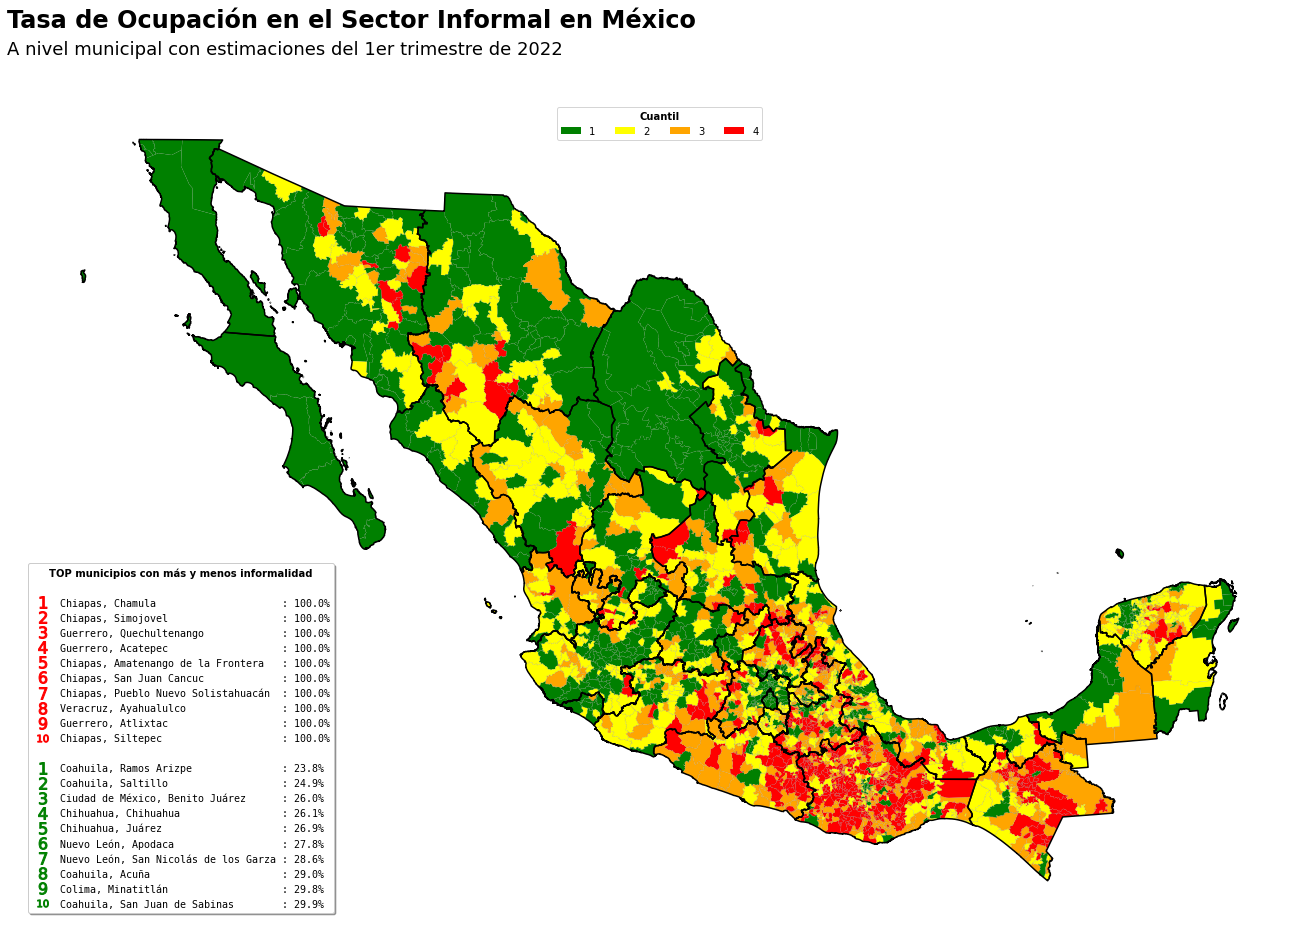

In [286]:
fig ,ax = plt.subplots(figsize = (25, 15))

# Plotea los limites de las entidades federativas
ent.boundary.plot(color = 'black', ax = ax)

# Muestra la tasa de ocupacion informal a nivel municipio
ilmm_geo.plot('tasa_ocup_sector_informal_quantile', ax = ax, legend = True, legend_kwds = {'extend': 'max'},
                edgecolors = 'grey', missing_kwds = {'color': 'red', 'alpha': 0.1}, linewidth = 0.1, color = ilmm_geo['tasa_ocup_sector_informal_quantile_c'])


# Agrega una leyenda
color_legend_elements = [
    Patch(facecolor = color, label = f'{q:.0f}') for q, color in quantile_colors.items() if 'nan' not in f'{q}'
]

# Agrega la leyenda de colores
color_legend = plt.legend(handles = color_legend_elements, title = 'Cuantil', title_fontproperties = {'weight': 'bold'}, ncol = 4, loc = 'upper center')
ax.add_artist(color_legend)

# Agrega una leyenda con los TOP
top_mas_legend_elements = [
    Line2D([], [], color = 'red', label = f"{row[1]['NOM_RESUM']:<{pad+1}}: {row[1]['tasa_ocup_sector_informal']:.1%}", marker = f'${ix}$', markersize = 12, linewidth = 0)
    for ix, row in enumerate(top_mas_inform.iterrows(), start = 1)
]

top_men_legend_elements = [
     Line2D([], [], color = row[1]['tasa_ocup_sector_informal_quantile_c'], label = f"{row[1]['NOM_RESUM']:<{pad+1}}: {row[1]['tasa_ocup_sector_informal']:.1%}", marker = f'${ix}$', markersize = 12, linewidth = 0)
    for ix, row in enumerate(top_men_inform.iterrows(), start = 1)
]

top_legend_elements = [
    Line2D([], [], color = 'white'), # padding
    *top_mas_legend_elements,
    Line2D([], [], color = 'white'), # padding
    *top_men_legend_elements
]

# Agrega la leyenda 
plt.legend(handles = top_legend_elements, title = 'TOP municipios con más y menos informalidad', prop = {'family': 'monospace'}, title_fontproperties = {'weight': 'bold'},
           loc = 'lower left', shadow = True)

# Agrega título
plt.figtext(0.15, 0.95, 'Tasa de Ocupación en el Sector Informal en México', weight = 'bold', size = 24, ha = 'left')
plt.figtext(0.15, 0.925, 'A nivel municipal con estimaciones del 1er trimestre de 2022', size = 18, ha = 'left')

# Apaga el axis
_ = plt.axis('off')

**TO DO**:
- Identificar zonas urbanas y rurales
- Mapear pobreza
- Correlacion entre estimacion de informalidad y variables de la poblacion (solo de los municipios que tienen data)